   <font color=red><h1>COVID-19 Total Cases and Deaths Predictions</h1></font>
   <h4>Considering the first wave</h4>

The curve used to model the pandemic total confirmed cases and deaths is called a logistic curve, an S-shaped curve.

<font color="red">\begin{equation}
y=c/(1+e^{-a(x-b)})
\end{equation}
    </font>
<font color="blue"><li>a- parameter that controls the growth of curve
    <li>b- is the inflexion point</li>
    <li>c- the maximum cases</li>
    <li>e- the natural logarithm base</li>
    <li>x- is the number of days</li>
    </font>

This curve is used to fit the avalable total cases, deaths and predict them for the future dates.
Below are the implications of the coefficients of the sigmoid curve when applied to the pandemic curve
<font color="green">
    <li> a is the growth factor</li>
    <li> b is nearly usual to the day, the countries peak has passed</li>
    <li> c is the maximum value expected to be recorder in the considered period</li>
    <li> x is the day since 22-Jan</li>
</font>

In [1]:
# importing the required modules
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import datetime

Predictions are done based on the global data collated by Johns Hopkins University
<a>https://github.com/CSSEGISandData/COVID-19</a>

In [2]:
#Extracting data of Total confirmed cases
df_conf=pd.read_excel("vic_conf.xls",'2_wave')


#Extracting data of Total deaths reported 
df_death=pd.read_excel("vic_death.xls",'2_wave')

This model can be used to get a rough prediction of the total confirmed cases and recorded deaths for any country with its data of total cases and recorded deaths available.
For, now the predictions are being done for the following countries:
<font color="blue">
<li>India</li>
<li>US</li>
    </font>

The first wave curve of China, South korea, Australia have almost flattened. As China recently release an updated death tolls, cases in China are not being modelled as, the daily modified deaths data is not available online.

In [3]:
df_cases_comp=df_conf[["Victoria"]]
df_deaths_comp=df_death
df_cases_pred_all = pd.DataFrame(index=range(0,210),columns=[df_cases_comp.columns])
df_deaths_pred_all = pd.DataFrame(index=range(0,210),columns=[df_cases_comp.columns])
df_cases_pred_3 = pd.DataFrame(index=range(0,210),columns=[df_cases_comp.columns])
df_deaths_pred_3 = pd.DataFrame(index=range(0,210),columns=[df_cases_comp.columns])
df_cases_pred_3 = pd.DataFrame(index=range(0,210),columns=[df_cases_comp.columns])
df_deaths_pred_3 = pd.DataFrame(index=range(0,210),columns=[df_cases_comp.columns])
columns=df_cases_comp.columns

start = datetime.datetime.strptime("22-04", "%d-%m")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, 210)]
i=0
for date in date_generated:
    date_generated[i]=(date.strftime("%d-%m"))
    i=i+1

<font color="red">The sigmoid function declared below is used to estimate the coefficients</font>

In [4]:
def f_sigmoid(x, a, b, c):
        return (c / (1 + np.exp(-b*(x-a))))

In [5]:
popt_sig=np.zeros((3,len(columns)))
popt_sig_cases_0=np.zeros((3,len(columns)))
popt_sig_deaths_0=np.zeros((3,len(columns)))
popt_sig_cases_1=np.zeros((3,len(columns)))
popt_sig_deaths_1=np.zeros((3,len(columns)))
popt_sig_cases_2=np.zeros((3,len(columns)))
popt_sig_deaths_2=np.zeros((3,len(columns)))

The predictions are done by following the below steps:
<li>To start with, an optimized curve fit is done on the available data for the considered country</li>
<li>In, order to develop a further accurate fit, the growth rate of the fit obtained are used to</li>


In [6]:
for j in range(0, len(columns)):
    x_data=np.linspace(0, len(df_cases_comp), len(df_cases_comp))
    y_data=df_cases_comp[columns[j]][0:len(df_cases_comp)]
    popt_sig_cases_0[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, 
        method='trf', bounds=([0, 0,0],[210, .2, 3*y_data.max()])))
    x_m = np.linspace(0, 210, 210)
    y_m = f_sigmoid(x_m, *popt_sig_cases_0[:,j])

In [7]:
for j in range(0, len(columns)):
    x_data=np.linspace(0, len(df_deaths_comp), len(df_deaths_comp))
    y_data=df_deaths_comp[columns[j]][0:len(df_deaths_comp)]
    popt_sig_deaths_0[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, 
         method='trf', bounds=([0, 0,0],[210, 2, 3*y_data.max()])))
    x_m = np.linspace(0, 210, 210)
    y_m = f_sigmoid(x_m, *popt_sig_deaths_0[:,j])

In [8]:
ind=[]
popt_sig_new=[]
for j in range(0, len(columns)):
    r_mat=[]
    value=np.linspace(popt_sig_cases_0[1,j]-0.1,popt_sig_cases_0[1,j]+0.1,100)
    for val in value:
        x_data=np.linspace(0, len(df_cases_comp), len(df_cases_comp))
        y_data=df_cases_comp[columns[j]][0:len(df_cases_comp)]
        popt_sig[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, method='trf', 
                    bounds=([0, val,y_data.max()],[210, val+0.01, 3*y_data.max()])))
        x_m = np.linspace(0, 210, 210)
        y_m = f_sigmoid(x_m, *popt_sig[:,j])
        train_x = x_data[0:round(len(df_cases_comp)-3)]
        test_x = x_data[round(len(df_cases_comp)-3):len(df_cases_comp)]
        train_y = y_data[0:round(len(df_cases_comp)-3)]
        test_y = y_data[round(len(df_cases_comp)-3):len(df_cases_comp)]
        y_hat = f_sigmoid(test_x, *popt_sig[:,j])
        r_mat.append(r2_score(y_hat , test_y))
    best_r2=(min(r_mat, key=lambda x:abs(x-1)))
    ind.append(r_mat.index(best_r2))
    popt_sig_new.append(value[r_mat.index(best_r2)])

In [9]:
ind=[]
popt_sig_new_1=[]
for j in range(0, len(columns)):
    r_mat=[]
    value=np.linspace(popt_sig_cases_0[1,j]-0.1,popt_sig_cases_0[1,j]+0.1,100)
    for val in value:
        x_data=np.linspace(0, len(df_cases_comp), len(df_cases_comp))
        y_data=df_cases_comp[columns[j]][0:len(df_cases_comp)]
        popt_sig[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, method='trf',
                    bounds=([0, val,y_data.max()],[210, val+0.01, 3*y_data.max()])))
        x_m = np.linspace(0, 210, 210)
        y_m = f_sigmoid(x_m, *popt_sig[:,j])
        train_x = x_data[0:round(len(df_cases_comp)-3)]
        test_x = x_data[round(len(df_cases_comp)-3):len(df_cases_comp)]
        train_y = y_data[0:round(len(df_cases_comp)-3)]
        test_y = y_data[round(len(df_cases_comp)-3):len(df_cases_comp)]
        y_hat = f_sigmoid(test_x, *popt_sig[:,j])
        r_mat.append(r2_score(y_hat , test_y))
    best_r2=(min(r_mat, key=lambda x:abs(x-1)))
    ind.append(r_mat.index(best_r2))
    popt_sig_new_1.append(value[r_mat.index(best_r2)])

Victoria:


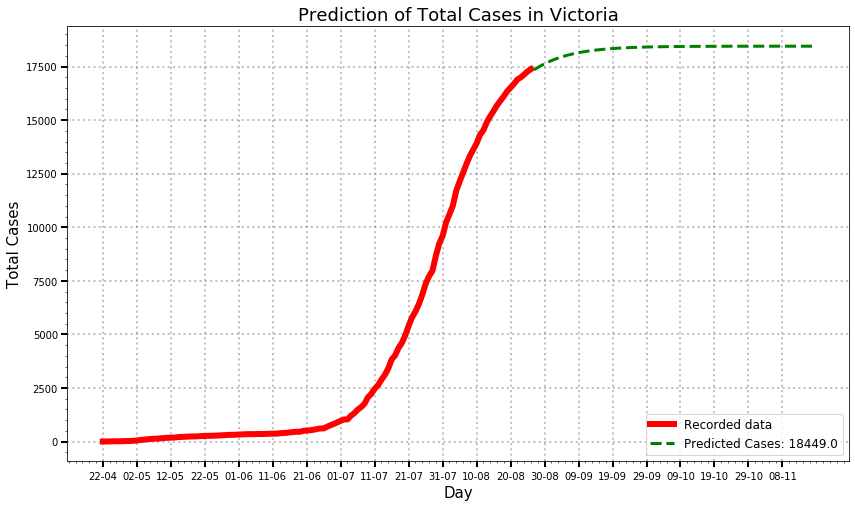

In [10]:
for j in range(0, len(columns)):
    x_data=np.linspace(0, len(df_cases_comp), len(df_cases_comp))
    y_data=df_cases_comp[columns[j]][0:len(df_cases_comp)]
    popt_sig_cases_0[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, 
            method='trf', bounds=([0, 0,y_data.max()],[210, 2, 3*y_data.max()])))   
    popt_sig_cases_1[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, 
            method='trf', bounds=([0, popt_sig_new[j]-0.00005,y_data.max()],[210, popt_sig_new[j], 3*y_data.max()])))
    x_m = np.linspace(0, 210, 210)
    x_m_plot = np.linspace(len(df_cases_comp), 210, 210-len(df_cases_comp))
    y_m_0_plot = f_sigmoid(x_m_plot, *popt_sig_cases_0[:,j])
    y_m_1_plot = f_sigmoid(x_m_plot, *popt_sig_cases_1[:,j])
    print(columns[j]+':')
    y_m_0 = f_sigmoid(x_m, *popt_sig_cases_0[:,j])
    y_m_1 = f_sigmoid(x_m, *popt_sig_cases_1[:,j])
    plt.figure(figsize=(14,8))
    plt.xticks(np.arange(0, 210, 10))
    plt.plot(date_generated[0:len(df_cases_comp)], y_data, 
             color='red', linewidth=6,label='Recorded data')
    plt.plot(date_generated[len(df_cases_comp): 210],y_m_1_plot,
             linewidth=3.0,linestyle='dashed',color='g', 
             label=r'Predicted Cases: '+str(round(popt_sig_cases_1[2,j])))
    plt.title(r"Prediction of Total Cases in "+columns[j],fontsize=18)
    leg = plt.legend(loc='lower right', fontsize=12, fancybox=True)
    plt.ylabel('Total Cases' ,fontsize=15)
    plt.xlabel('Day', fontsize=15)
    plt.grid(b=True,color='red', alpha=0.3, linestyle=':', linewidth=2)
    plt.minorticks_on()
    plt.tick_params(axis='both', direction='out', length=6, width=2, 
                     grid_color='gray', grid_alpha=0.5)
    plt.rcParams['figure.figsize'] = [1200, 1000]
    plt.savefig(r'Total Cases Prediction by 210th day'+columns[j]+'.png')
    plt.show()
    df_cases_pred_all[[columns[j]]]=y_m_0
    df_cases_pred_3[[columns[j]]]=y_m_1


In [11]:
ind=[]
popt_sig_deaths_new=[]
for j in range(0, len(columns)):
    r_mat=[]
    value=np.linspace(popt_sig_deaths_0[1,j]-0.1,popt_sig_deaths_0[1,j]+0.1,100)
    for val in value:
        x_data=np.linspace(0, len(df_deaths_comp), len(df_deaths_comp))
        y_data=df_deaths_comp[columns[j]][0:len(df_deaths_comp)]
        popt_sig[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, method='trf', 
                            bounds=([0, val,y_data.max()],[210, val+0.01, 2*y_data.max()])))
        x_m = np.linspace(0, 210, 210)
        y_m = f_sigmoid(x_m, *popt_sig[:,j])
        train_x = x_data[0:round(len(df_deaths_comp)-3)]
        test_x = x_data[round(len(df_deaths_comp)-3):len(df_deaths_comp)]
        train_y = y_data[0:round(len(df_deaths_comp)-3)]
        test_y = y_data[round(len(df_deaths_comp)-3):len(df_deaths_comp)]
        y_hat = f_sigmoid(test_x, *popt_sig[:,j])
        r_mat.append(r2_score(y_hat , test_y))
    best_r2=(min(r_mat, key=lambda x:abs(x-1)))
    ind.append(r_mat.index(best_r2))
    popt_sig_deaths_new.append(value[r_mat.index(best_r2)])

In [12]:
ind=[]
popt_sig_deaths_new_1=[]
for j in range(0, len(columns)):
    r_mat=[]
    value=np.linspace(popt_sig_deaths_0[1,j]-0.1,popt_sig_deaths_0[1,j]+0.1,100)
    for val in value:
        x_data=np.linspace(0, len(df_deaths_comp), len(df_deaths_comp))
        y_data=df_deaths_comp[columns[j]][0:len(df_deaths_comp)]
        popt_sig[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, method='trf', bounds=([0, val,y_data.max()],[210, val+0.01, 2*y_data.max()])))
        x_m = np.linspace(0, 210, 210)
        y_m = f_sigmoid(x_m, *popt_sig[:,j])
        train_x = x_data[0:round(len(df_deaths_comp)-3)]
        test_x = x_data[round(len(df_deaths_comp)-3):len(df_deaths_comp)]
        train_y = y_data[0:round(len(df_deaths_comp)-3)]
        test_y = y_data[round(len(df_deaths_comp)-3):len(df_deaths_comp)]
        y_hat = f_sigmoid(test_x, *popt_sig[:,j])
        r_mat.append(r2_score(y_hat , test_y))
    best_r2=(min(r_mat, key=lambda x:abs(x-1)))
    ind.append(r_mat.index(best_r2))
    popt_sig_deaths_new_1.append(value[r_mat.index(best_r2)])

Victoria:


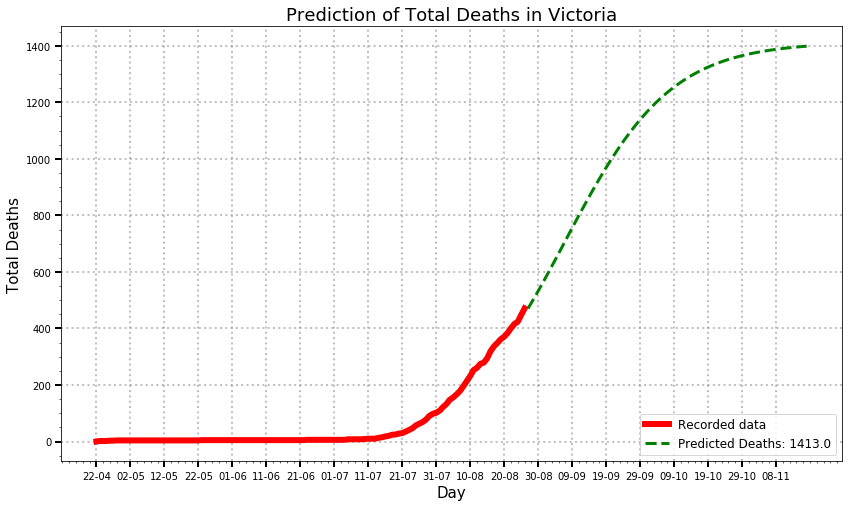

In [13]:
for j in range(0, len(columns)):
    x_data=np.linspace(0, len(df_deaths_comp), len(df_deaths_comp))
    y_data=df_deaths_comp[columns[j]][0:len(df_deaths_comp)]
    popt_sig_deaths_0[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, 
            method='trf', bounds=([0, 0,y_data.max()],
                                  [210,  2, 3*y_data.max()])))
    popt_sig_deaths_1[:,j], pcov_sig =(curve_fit(f_sigmoid, x_data, y_data, 
            method='trf', bounds=([0, popt_sig_deaths_new_1[j]-0.00005,y_data.max()],
                                  [210, popt_sig_deaths_new_1[j], 3*y_data.max()])))
    x_m = np.linspace(0, 210, 210)
    x_m_plot = np.linspace(len(df_deaths_comp), 210, 210-len(df_deaths_comp))
    y_m_0_plot = f_sigmoid(x_m_plot, *popt_sig_deaths_0[:,j])    
    popt_sig_deaths_1[0,j]=popt_sig_deaths_1[0,j]
    y_m_1_plot = f_sigmoid(x_m_plot, *popt_sig_deaths_1[:,j])
    print(columns[j]+':')
    y_m_0 = f_sigmoid(x_m, *popt_sig_deaths_0[:,j])
    y_m_1 = f_sigmoid(x_m, *popt_sig_deaths_1[:,j])   
    plt.figure(figsize=(14,8))
    plt.xticks(np.arange(0, 210, 10))
    plt.plot(date_generated[0:len(df_deaths_comp)], y_data, color='red', 
             linewidth=6,label='Recorded data')
    plt.plot(date_generated[len(df_deaths_comp): 210],y_m_1_plot, 
             linewidth=3.0,linestyle='dashed',color='g', 
             label=r'Predicted Deaths: '+str(round(popt_sig_deaths_1[2,j])))
    plt.title(r"Prediction of Total Deaths in "+columns[j] ,fontsize=18)
    leg = plt.legend(loc='lower right', fontsize=12, fancybox=True)
    plt.ylabel('Total Deaths' ,fontsize=15)
    plt.xlabel('Day', fontsize=15)
    plt.grid(b=True,color='red', alpha=0.3, linestyle=':', linewidth=2)
    plt.minorticks_on()
    plt.tick_params(axis='both', direction='out', length=6, width=2, 
                     grid_color='gray', grid_alpha=0.5)
    plt.rcParams['figure.figsize'] = [1200, 1000]
    plt.savefig(r'Total Deaths Prediction on 210th day'+columns[j]+'.png')
    plt.show()
    df_deaths_pred_all[[columns[j]]]=y_m_0
    df_deaths_pred_3[[columns[j]]]=y_m_1


In [14]:
df_deaths_pred_3=df_deaths_pred_3.round(decimals=0)
df_cases_pred_3=df_cases_pred_3.round(decimals=0)
df_deaths_pred_3.insert(0,"Date",date_generated)
df_cases_pred_3.insert(0,"Date",date_generated)

In [15]:
with pd.ExcelWriter('predictions_vic_19_08_3_day_2_wave.xlsx') as writer:  
    df_deaths_pred_3.to_excel(writer, sheet_name='deaths_3')
    df_cases_pred_3.to_excel(writer, sheet_name='cases_3')
    df_cases_comp.to_excel(writer, sheet_name='actual_cases')
    df_deaths_comp.to_excel(writer, sheet_name='actual_deaths')

In [16]:
pd.set_option('colwidth', 40)
df_cases_param_3 = pd.DataFrame(index=range(0,3),columns=[df_cases_comp.columns])
df_deaths_param_3= pd.DataFrame(index=range(0,3),columns=[df_cases_comp.columns])
df_mortality_3 = pd.DataFrame(index=range(0,1),columns=[df_cases_comp.columns])
for i in range(0,len(columns)):
    (df_cases_param_3[[columns[i]]])=popt_sig_cases_1.transpose()[i]
    (df_deaths_param_3[[columns[i]]])=popt_sig_deaths_1.transpose()[i]
    df_mortality_3[[columns[i]]]=popt_sig_deaths_1.transpose()[i][2]*100/popt_sig_cases_1.transpose()[i][2]
df_cases_param_3=df_cases_param_3.rename(index={0:"Peak Day",1:"Growth Rate",2:"Predicted Cases_210_Day"})
df_deaths_param_3=df_deaths_param_3.rename(index={0:"Peak Day",1:"Growth Rate",2:"Predicted Deaths_210_Day"})
df_mortality_3=df_mortality_3.rename(index={0:"Mortality Rate (%)"})

In [17]:
print("Coefficients of sigmoid function for predicting cases considering the best fit for trainig last 10 days of cases")
df_cases_param_3=df_cases_param_3.round(3)
df_cases_param_3

Coefficients of sigmoid function for predicting cases considering the best fit for trainig last 10 days of cases


,Victoria
Peak Day,99.672
Growth Rate,0.101
Predicted Cases_210_Day,18448.635


In [18]:
print("Coefficients of sigmoid function for predicting deaths considering the best fit for trainig last 10 days of cases")
df_deaths_param_3=df_deaths_param_3.round(3)
df_deaths_param_3

Coefficients of sigmoid function for predicting deaths considering the best fit for trainig last 10 days of cases


,Victoria
Peak Day,137.964
Growth Rate,0.063
Predicted Deaths_210_Day,1413.000


In [19]:
print("Mortality rate considering the best fit for trainig last 10 days of cases")
display(df_mortality_3)

Mortality rate considering the best fit for trainig last 10 days of cases


,Victoria
Mortality Rate (%),7.6591


# References:
<li>https://github.com/CSSEGISandData/COVID-19
<li>http://www.healthdata.org/sites/default/files/files/research_articles/2020/CovidModel_Appendix.pdf
<li>https://covid19.healthdata.org/united-states-of-america
<li>https://www.covidanalytics.io/projections